## No rooted-out branching - Method 1

In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
import numpy as np

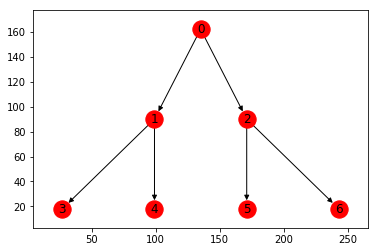

In [2]:
G = nx.balanced_tree(create_using=nx.DiGraph(), h=2, r=2)
layout = graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos=layout)

Find root, $r$

In [3]:
root = [n for n,d in G.in_degree() if d==0][0]
root

0

Children of root, $\{ c_0, c_1 \}$

In [4]:
c = [n for n in G.neighbors(root)]
c

[1, 2]

Delete one of the edges so that we have 2 disconnected trees

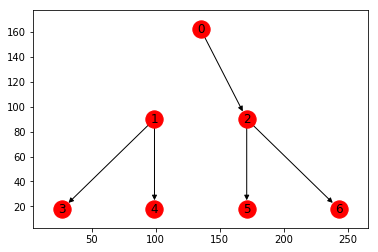

In [5]:
del_edge_to = c[0]
keep_edge_to = c[1]
G.remove_edge(root, del_edge_to)
nx.draw_networkx(G, pos=layout)

In [6]:
children_small = [n for n in G.neighbors(del_edge_to)]
children_small

[3, 4]

In [7]:
children_big = [n for n in G.neighbors(keep_edge_to)]
children_big

[5, 6]

In [8]:
#G.add_edge(children_small[1],children_big[0])
G.add_edge(5,4)

Connect edges to no longer have a tree structure

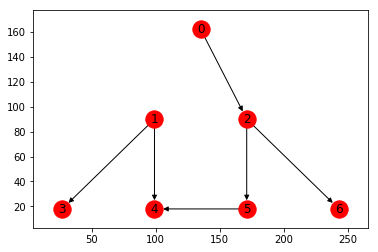

In [9]:
nx.draw_networkx(G, pos=layout)

In [10]:
N = nx.number_of_nodes(G)
A = nx.adjacency_matrix(G).transpose()
D = np.diag(np.asarray(np.sum(A, axis=1)).reshape(-1))
L = D - A
np.linalg.matrix_rank(L)

5

In [11]:
from scipy.integrate import solve_ivp

In [12]:
init = np.random.rand(N)
f1 = lambda t,x: np.asarray(-L.dot(x))[0]
res1 = solve_ivp(fun=f1, t_span=[0,100], y0=init)

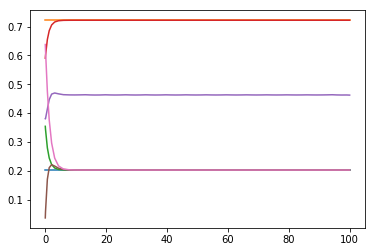

In [13]:
for i in np.arange(0,N):
    plt.plot(res1.t, res1.y[i,:])

In [14]:
res1.y[:,-1]

array([0.2025411 , 0.72178548, 0.2025411 , 0.72178548, 0.4622549 ,
       0.2025411 , 0.2025411 ])

### Symmetrization

In [15]:
from scipy.linalg import null_space
from scipy.linalg import solve_lyapunov

In [16]:
Q = null_space(null_space(L).transpose()).transpose()
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [17]:
f2 = lambda t,x: -eqL.dot(x)
res2 = solve_ivp(fun=f2, t_span=[0,20], y0=init)

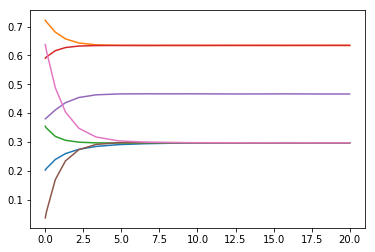

In [18]:
for i in np.arange(0,N):
    plt.plot(res2.t, res2.y[i,:], label=i)

In [19]:
res2.y[:,-1]

array([0.29693543, 0.63455585, 0.29707389, 0.63462414, 0.46604588,
       0.29682661, 0.2969632 ])

Final result

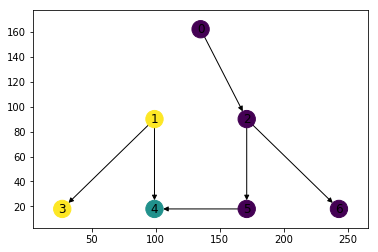

In [20]:
nx.draw_networkx(G, node_color = res1.y[:,-1], pos=layout)

In [21]:
init-res1.y[:,-1]

array([ 0.        ,  0.        ,  0.15150204, -0.13148373, -0.08202348,
       -0.166026  ,  0.43506591])

In [22]:
eqL

array([[ 5.00000000e-01, -1.65659627e-16, -5.00000000e-01,
         2.07870207e-16, -9.35645650e-17,  5.08612766e-16,
         6.54888412e-16],
       [-2.70635492e-16,  6.64383562e-01, -2.73972603e-02,
        -4.17808219e-01, -4.93150685e-01,  2.19178082e-01,
         5.47945205e-02],
       [-5.00000000e-01, -2.73972603e-02,  1.17123288e+00,
        -1.36986301e-02,  8.21917808e-02, -3.69863014e-01,
        -3.42465753e-01],
       [ 1.56247067e-16, -4.17808219e-01, -1.36986301e-02,
         5.41095890e-01, -2.46575342e-01,  1.09589041e-01,
         2.73972603e-02],
       [-2.67464056e-17, -4.93150685e-01,  8.21917808e-02,
        -2.46575342e-01,  1.47945205e+00, -6.57534247e-01,
        -1.64383562e-01],
       [ 5.17369670e-16,  2.19178082e-01, -3.69863014e-01,
         1.09589041e-01, -6.57534247e-01,  9.58904110e-01,
        -2.60273973e-01],
       [ 5.24500728e-16,  5.47945205e-02, -3.42465753e-01,
         2.73972603e-02, -1.64383562e-01, -2.60273973e-01,
         6.8493150

In [23]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        if(eqL[i,j] > -1e-6 and eqL[i,j] < 0):
            print(str(i)+','+str(j))
            eqG.add_edge(i,j,weight=-eqL[i,j])

0,1
0,4


/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


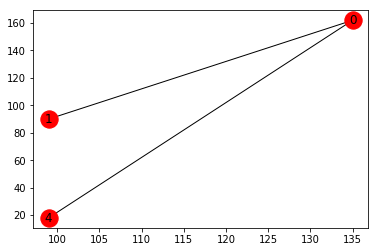

In [24]:
nx.draw_networkx(eqG, pos=layout)